In [1]:
import arff, numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = arff.load(open('cocomo811.arff'))
data=np.array(dataset['data'])

In [3]:
data.shape


(63, 17)

In [4]:
X=data[:,0:16]
Y=data[:,16:17]

In [5]:
Y=Y.reshape(63)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=42)
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)

In [7]:
MMRE_list=[]
MdMRE_list=[]
Pred_list= []
for i in np.arange(1,11):   
    clf= RandomForestClassifier(n_estimators=100,max_features=i)
    clf.fit(X_train, training_scores_encoded)
    Y_pred=clf.predict(X_test)
    diff=np.absolute(y_test-Y_pred)
    MRE=diff/y_test
    MMRE=np.mean(MRE)
    MdMRE=np.median(MRE)
    P=MRE[MRE<.25]
    Pred=(P.size/MRE.size) * 100
    MMRE_list.append(MMRE)
    MdMRE_list.append(MdMRE)
    Pred_list.append(Pred)

In [8]:
MMRE_list

[0.8191628522560052,
 0.8167810664161552,
 0.8266952733946559,
 0.8224046398769348,
 0.7995433864474922,
 0.8098648409339096,
 0.8273091632211803,
 0.8532167684259131,
 0.8502297799004133,
 0.845698095057094]

In [9]:
Pred_list

[5.263157894736842,
 5.263157894736842,
 5.263157894736842,
 5.263157894736842,
 10.526315789473683,
 10.526315789473683,
 5.263157894736842,
 5.263157894736842,
 5.263157894736842,
 5.263157894736842]

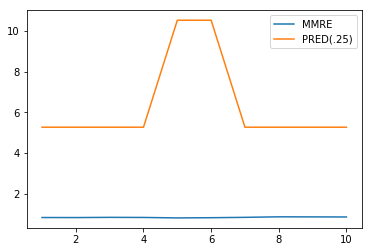

In [10]:
x = np.arange(1,11)

plt.plot(x, MMRE_list)
plt.plot(x, Pred_list)

plt.legend(['MMRE', 'PRED(.25)'], loc='upper right')

plt.show()

In [11]:
MMRE_list=[]
MdMRE_list=[]
Pred_list= []
for i in np.arange(100,2000,100):   
    clf= RandomForestClassifier(n_estimators=i,max_features=7)
    clf.fit(X_train, training_scores_encoded)
    Y_pred=clf.predict(X_test)
    diff=np.absolute(y_test-Y_pred)
    MRE=diff/y_test
    MMRE=np.mean(MRE)
    MdMRE=np.median(MRE)
    P=MRE[MRE<.25]
    Pred=(P.size/MRE.size) * 100
    MMRE_list.append(MMRE)
    MdMRE_list.append(MdMRE)
    Pred_list.append(Pred)

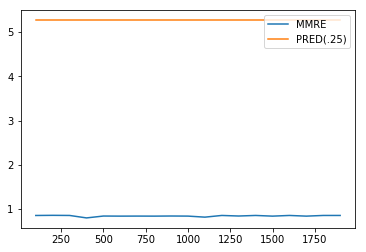

In [12]:
x = np.arange(100,2000,100)

plt.plot(x, MMRE_list)
plt.plot(x, Pred_list)

plt.legend(['MMRE', 'PRED(.25)'], loc='upper right')

plt.show()

In [60]:
MMRE_list

[0.8385882830375305,
 0.8286124783212316,
 0.857380862101287,
 0.8430833852055422,
 0.8573900957116285,
 0.8194859276694129,
 0.8112446504287296,
 0.8601608890918403,
 0.857380862101287,
 0.857380862101287,
 0.8556357097467163,
 0.8448377711704543,
 0.842057744179901,
 0.8577409729046109,
 0.8580602427391163,
 0.842057744179901,
 0.8580602427391163,
 0.8556264761363745,
 0.8403033582149887]

In [13]:
Pred_list

[5.263157894736842,
 5.263157894736842,
 5.263157894736842,
 5.263157894736842,
 5.263157894736842,
 5.263157894736842,
 5.263157894736842,
 5.263157894736842,
 5.263157894736842,
 5.263157894736842,
 5.263157894736842,
 5.263157894736842,
 5.263157894736842,
 5.263157894736842,
 5.263157894736842,
 5.263157894736842,
 5.263157894736842,
 5.263157894736842,
 5.263157894736842]

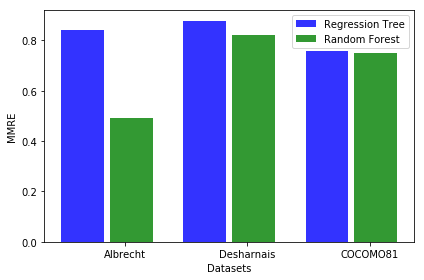

In [20]:
import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 3
RT = (.840, .877, 0.756)
RF = (.493, .821, 0.751)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, RT, bar_width,
alpha=opacity,
color='b',
label='Regression Tree')
 
rects2 = plt.bar(index + bar_width+.05, RF, bar_width,
alpha=opacity,
color='g',
label='Random Forest')
 
plt.xlabel('Datasets')
plt.ylabel('MMRE')
#plt.title('Scores by person')
plt.xticks(index + bar_width, ('Albrecht', 'Desharnais', 'COCOMO81'))
plt.legend()
 
plt.tight_layout()
plt.show()


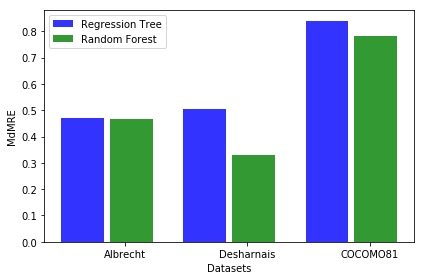

In [22]:
import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 3
RT = (.472, .504, 0.83940)
RF = (.465, .3291, 0.7836)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, RT, bar_width,
alpha=opacity,
color='b',
label='Regression Tree')
 
rects2 = plt.bar(index + bar_width+.05, RF, bar_width,
alpha=opacity,
color='g',
label='Random Forest')
 
plt.xlabel('Datasets')
plt.ylabel('MdMRE')
#plt.title('Scores by person')
plt.xticks(index + bar_width, ('Albrecht', 'Desharnais', 'COCOMO81'))
plt.legend()
 
plt.tight_layout()
plt.show()


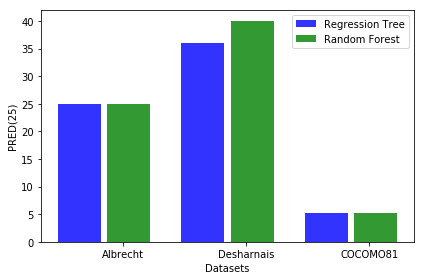

In [23]:
import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 3
RT = (25, 36, 5.26)
RF = (25, 40, 5.26)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, RT, bar_width,
alpha=opacity,
color='b',
label='Regression Tree')
 
rects2 = plt.bar(index + bar_width+.05, RF, bar_width,
alpha=opacity,
color='g',
label='Random Forest')
 
plt.xlabel('Datasets')
plt.ylabel('PRED(25)')
#plt.title('Scores by person')
plt.xticks(index + bar_width, ('Albrecht', 'Desharnais', 'COCOMO81'))
plt.legend()
 
plt.tight_layout()
plt.show()